# Stock Market Analysis

This is a data analysis project for Udemy course looking at the data from the technology stock market. The purpose of this project is to utilize data extraction and visualization obtained through the course and analyze the risk of stock as well predict future stock prices using a Monte Carlo method.

Here are the questions will be answered:

    1) What was the change in price of the stock over time?
    2) What was daily return on the stock on average?
    3) What was the moving average of the various stocks?
    4) What was the correlation between different stocks' closing prices?
    4) What was the correlation between different stocks' daily returns?
    5) How much value do we put at risk by investing in a particular stock?
    6) How can we attempt to predict future stock behavior?


In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import MonthLocator
sns.set_style('whitegrid')
%matplotlib inline

# For reading data from yahoo
from pandas_datareader import data,wb

# For time stamps
from datetime import datetime

# For division
from __future__ import division

### Data Extraction

In [2]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [3]:
end = '11/30/2016'
start = '11/30/2015'

In [4]:
for stock in tech_list:
    globals()[stock] = data.DataReader(stock,'yahoo',start, end)

### Basic Analysis of Stock Information
Handling stock information and analyze basic attributes of the information.

In [5]:
# General Information
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 254 entries, 2015-11-30 to 2016-11-30
Data columns (total 6 columns):
Open         254 non-null float64
High         254 non-null float64
Low          254 non-null float64
Close        254 non-null float64
Volume       254 non-null int64
Adj Close    254 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.9 KB


In [6]:
# Summary Stats
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,254.000000,254.000000,254.000000,254.000000,2.540000e+02,254.000000
mean,104.450984,105.346457,103.541614,104.470276,3.948609e+07,103.250980
std,7.518553,7.471912,7.511582,7.502220,1.733231e+07,7.664765
min,90.000000,91.669998,89.470001,90.339996,1.142440e+07,89.394274
25%,97.337500,98.215000,96.592501,97.189998,2.750905e+07,95.883133
50%,105.550000,106.389999,104.849998,105.750000,3.441630e+07,104.171987
75%,110.110003,111.262499,109.207498,110.322502,4.628482e+07,109.251989
max,118.980003,119.860001,117.809998,119.029999,1.333697e+08,117.645979


### Historical Adjusted Closing Price
Apple adjusted closing price data from 11/30/2015 through 11/30/2016

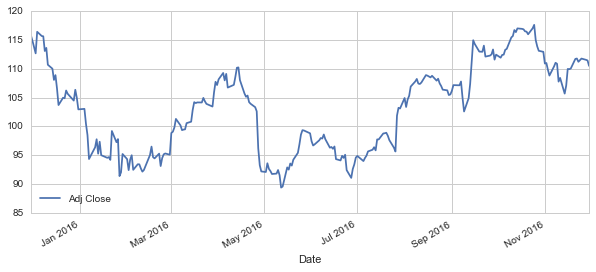

In [7]:
AAPL['Adj Close'].plot(legend=True, figsize= (10,4))

### Historical Volume Data
Apple total volume of stocks traded per day from 11/30/2015 through 11/30/2016

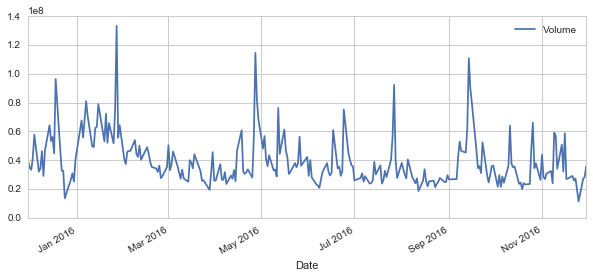

In [8]:
AAPL['Volume'].plot(legend = True, figsize= (10,4))

After taking close look at above plots, adjusted closing price and volume of stocks traded, it looks like there was always a huge increase in the volume when there was large jump or drop in the closing price.

To see more clearly, will put two plots in one graph.

### Historical Adjusted Closing Price and Volume

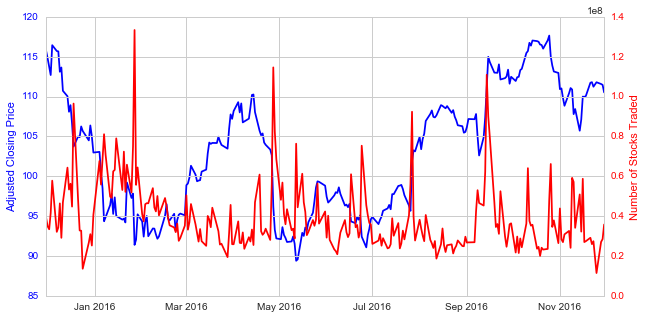

In [9]:
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(AAPL['Adj Close'],'b')
ax1.set_ylabel('Adjusted Closing Price',color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax2 = ax1.twinx()
ax2.plot(AAPL['Volume'],'r')
ax2.set_ylabel('Number of Stocks Traded',color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

Here it's cler that there is the relationship between Adjusted Closing Price and Number of Stocks Traded; a big price jump or drop would cause the increase in the number of stocks traded.  

### Historical Moving Average
Moving average is the average stock price over a set period of time. It is used as a technical analysis tool that smooths out price data by filtering out the noise from random price fluctuations.

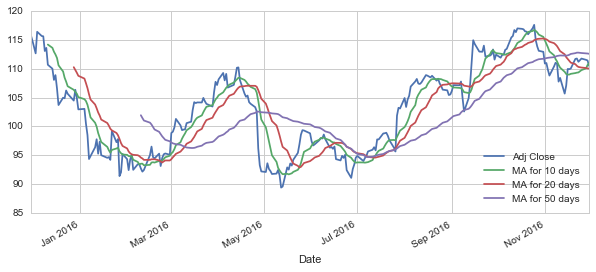

In [10]:
ma_day = [10,20,50]

for ma in ma_day:
    column_name = 'MA for %s days'%(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(window=ma).mean()

AAPL[['Adj Close', 'MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False, figsize=(10,4))


The closing price had gradually been increasing since July.

### Daily Return Analysis
For further analysis, will examine the daily changes of stock price using pct_change function to retrieve the daily returns.

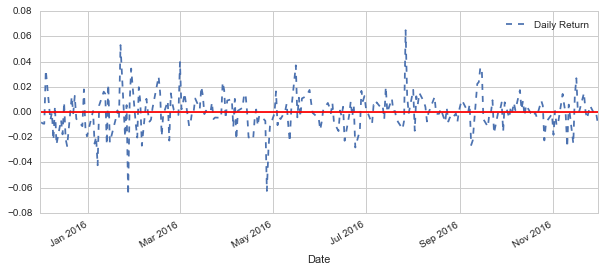

In [11]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(legend = True, figsize=(10,4), linestyle='--')

x = AAPL['Daily Return'].mean()
plt.axhline(x,color='r')

Average daily return is slightly below 0%, which means there was lilttle higher chance of losing than gaining between 11/30/2015 to 11/30/2016. 
Below is the histogram for the daily return.

### Average Daily Return

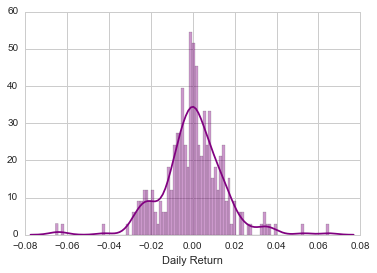

In [12]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

### Correlation of Daily Return for Two Stocks
To check the correlation of two stocks' daily return, first creating dataframe for all the adjusted closing prices for the tech stock list. Then, converting to daily return using pct_change as we did earlier. To compare daily percentage return of two stocks, will use jointplot.

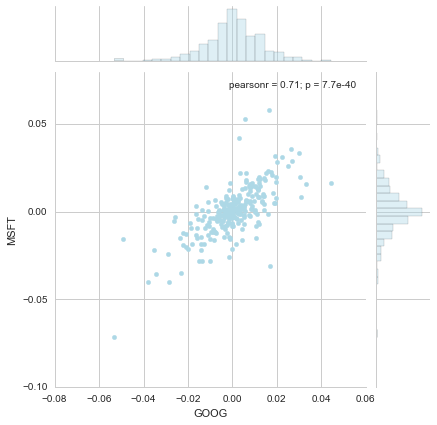

In [13]:
closing_df = data.DataReader(tech_list, 'yahoo',start, end)['Adj Close']
tech_rets = closing_df.pct_change()

sns.jointplot('GOOG','MSFT',tech_rets, kind= 'scatter',color='lightblue')

### Correlation of Daily Return for Multiple Stocks
Will use two methods, seaborn pairplot and pandas PairGrid, to do comparison analysis for every possible combination of stocks.

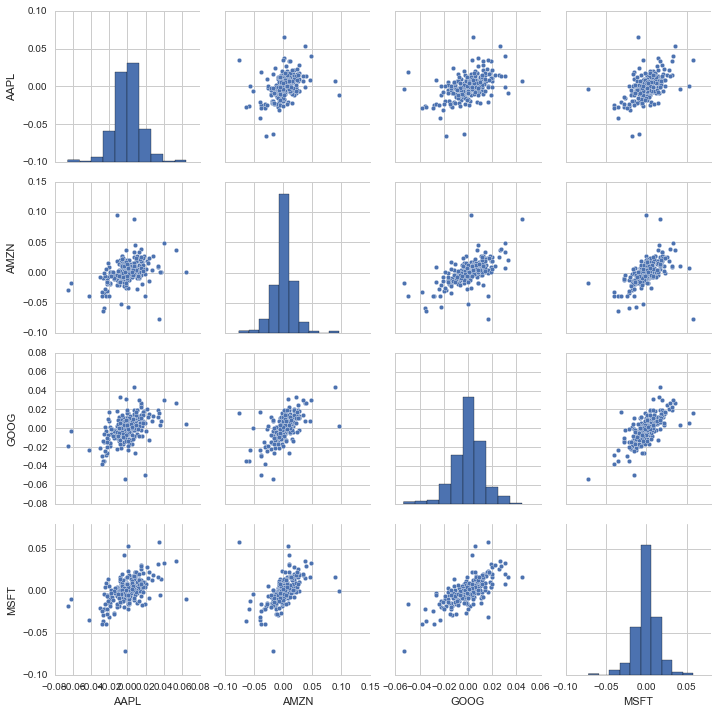

In [14]:
sns.pairplot(tech_rets.dropna())

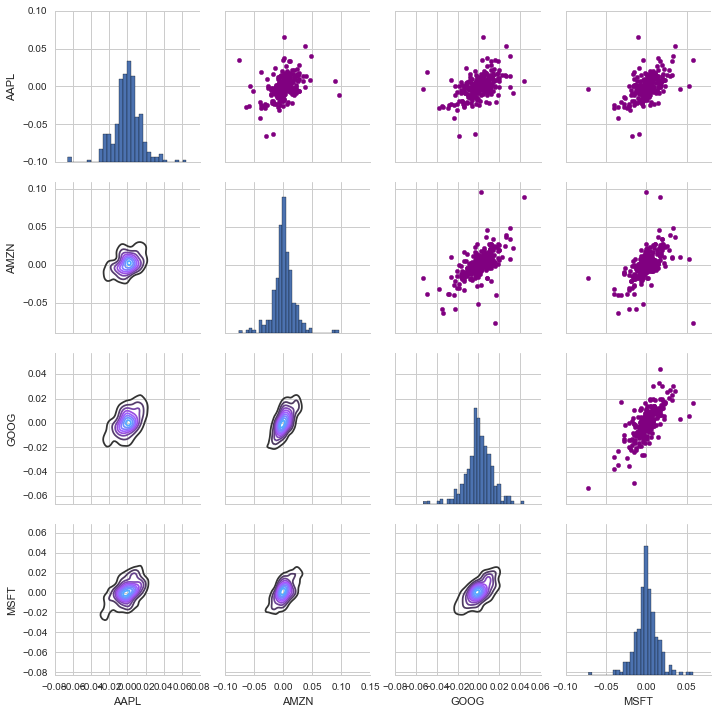

In [15]:
returns_fig = sns.PairGrid(tech_rets.dropna())

returns_fig.map_upper(plt.scatter, color= 'purple')

returns_fig.map_lower(sns.kdeplot, cmap = 'cool_d')

returns_fig.map_diag(plt.hist, bins = 30)

### Correlation of Adjusted Closing Price for Multiple Stocks

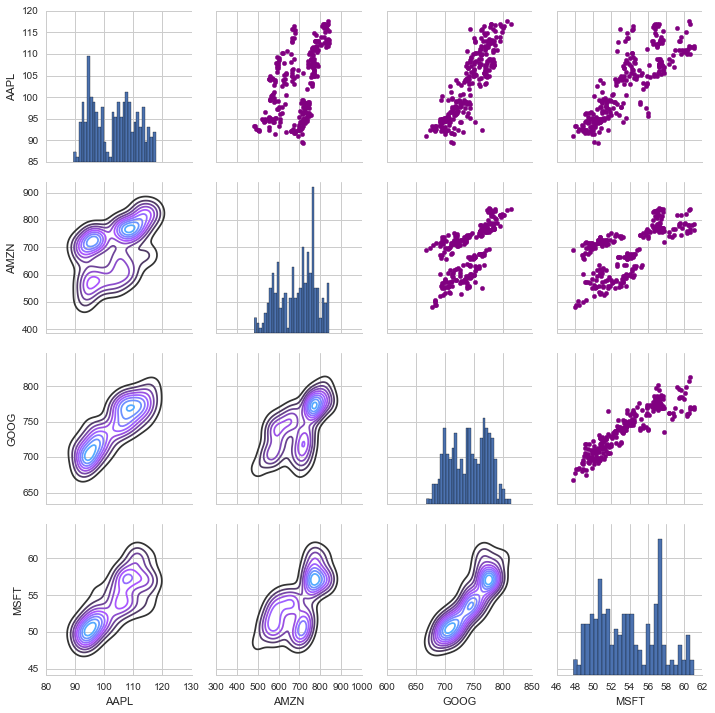

In [16]:
returns_fig= sns.PairGrid(closing_df)

returns_fig.map_upper(plt.scatter, color ='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

### Numerical Values for the Correlation of Daily Return

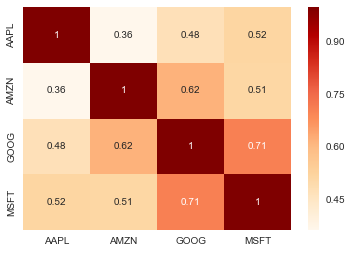

In [17]:
sns.heatmap(tech_rets.dropna().corr(), cmap='OrRd',annot=True)

### Numerical Values for the Correlation of Adjusted Closing Price

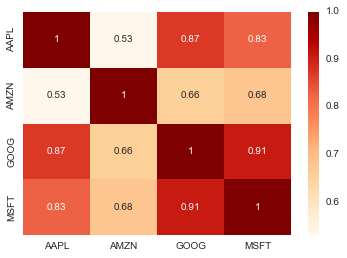

In [18]:
sns.heatmap(closing_df.dropna().corr(), cmap= 'OrRd', annot= True)

### Risk Analysis
To quntify risk for risk analysis, will use standard deviation of the daily returns and compare the expected return with it. The larger standard deviation implies the return of stock would vary more either in positive or negative direction, or the stock has higher risk.

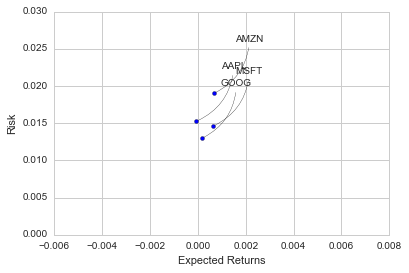

In [19]:
rets= tech_rets.dropna()

area= np.pi*5

plt.scatter(rets.mean(), rets.std(), s = area)

plt.xlabel('Expected Returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
        label,
        xy=(x,y), xytext = (50,50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

Although Google has the lowest risk, it's hard to determine which is the best stock in terms of risk and return. To find out risk-return tradeoff, will need to get the coefficient of variation, or std/mean; the lower the ratio of coefficient of variation is, the better risk-return tradeoff is. 

In [20]:
rets.std()/rets.mean()

AAPL   -231.353217
AMZN     28.821600
GOOG     78.383122
MSFT     23.468869
dtype: float64

From the coefficient of variation, Microsoft has the best tradeoff of risk-return.

### Value at Risk Using Quartile
Use the empirical quantiles from a histogram of daily returns to get the risk value for the stock.

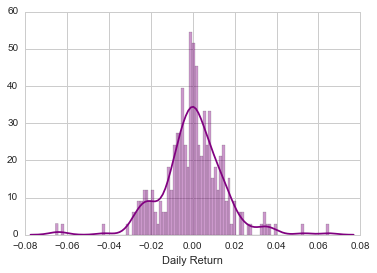

In [21]:
sns.distplot(AAPL['Daily Return'].dropna(), bins = 100, color = 'purple')

In [22]:
rets['AAPL'].quantile(0.05)

-0.02443288787731126

We can see the 0.05 emperical quantile of daily return is at -0.0244, which implies that with 95% confidence, the worst daily loss will not exceed 2.44%. Repeat the same for other three stocks.

In [23]:
rets.quantile(0.05)

AAPL   -0.024433
AMZN   -0.030066
GOOG   -0.021449
MSFT   -0.021483
Name: 0.05, dtype: float64

With 95% confidence, Amazon has the most value at risk while Google has the least.

### Value at Risk Using the Monte Carlo Method

In [24]:
# Set up time horizon
days = 365

# Delta
dt = 1/days

# Mu: drift
mu = rets.mean()['GOOG']

# Sigma or vaolatility of stock
sigma = rets.std()['GOOG']

In [25]:
# Function that takes in the starting price and number of days, using the sigma and mu

def stock_monte_carlo(start_price, days, mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Monte Carlo equation
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + (price[x-1]*(drift[x] + shock[x]))
                                 
    return price
        
        

In [26]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-11-30,748.809998,754.929993,741.270020,742.599976,2097600,742.599976
2015-12-01,747.109985,768.950012,746.700012,767.039978,2134600,767.039978
2015-12-02,768.900024,775.955017,758.960022,762.380005,2230400,762.380005
2015-12-03,766.010010,768.994995,745.630005,752.539978,2590600,752.539978
2015-12-04,753.099976,768.489990,750.000000,766.809998,2757300,766.809998


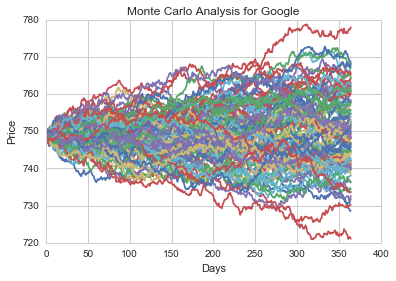

In [27]:
start_price = GOOG['Open'][0]

for run in xrange(100):
    plt.plot(stock_monte_carlo(start_price, days,mu,sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis for Google')

In [28]:
runs = 10000

simulations = np.zeros(runs)

for run in xrange(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

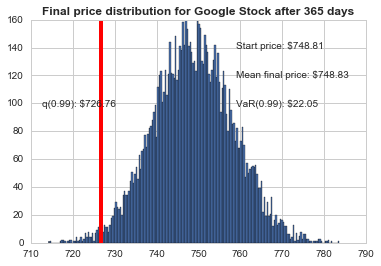

In [29]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins = 200)

# Starting Price
plt.figtext(0.6,0.8, 'Start price: $%.2f' %start_price)
# Mean ending price
plt.figtext(0.6,0.7, 'Mean final price: $%.2f' %simulations.mean())

# Variance of the price (withtin 99% CI)
plt.figtext(0.6,0.6, 'VaR(0.99): $%.2f'%(start_price-q))

# Display 1% quantile
plt.figtext(0.15,0.6,"q(0.99): $%.2f" %q)

# Plot a line at the 1% quantile result
plt.axvline(x=q,linewidth = 4, color = 'r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days"%days,weight = 'bold')